# Рабочая тетрадь № 8
## Дудин Алексей

## Задание 1

Дан массив данных
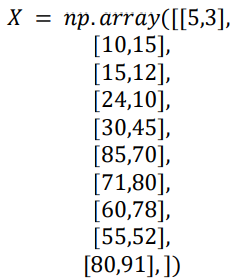
Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

from sklearn.datasets import load_digits
X = np.array([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91],])

In [2]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(X.data)
kmeans.cluster_centers_.shape

(10, 2)

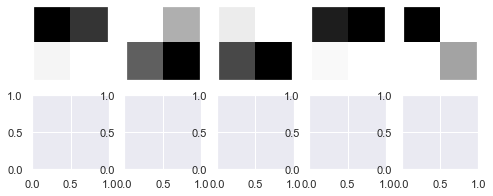

In [3]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(5, 2, 2)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## Задание 2

Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров.

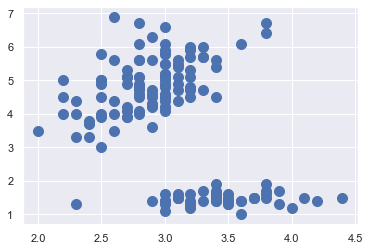

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

dataset = sns.load_dataset('iris')
X = dataset.iloc[:,1:3].values
plt.scatter(X[:, 0], X[:, 1], s = 100);
plt.show()

In [5]:
dataset.shape

(150, 5)

In [6]:
kmeans = KMeans(n_clusters = 100)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

(100, 2)

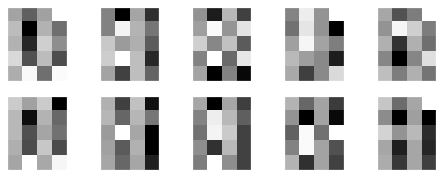

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 5, 4)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## Задание 3

Задание. Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# загрузим набор данных
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
customer_data = pd.read_csv(url)
customer_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [90]:
customer_data.shape

(150, 5)

In [91]:
data = customer_data.iloc[:,2:4].values

<Figure size 5040x2160 with 0 Axes>

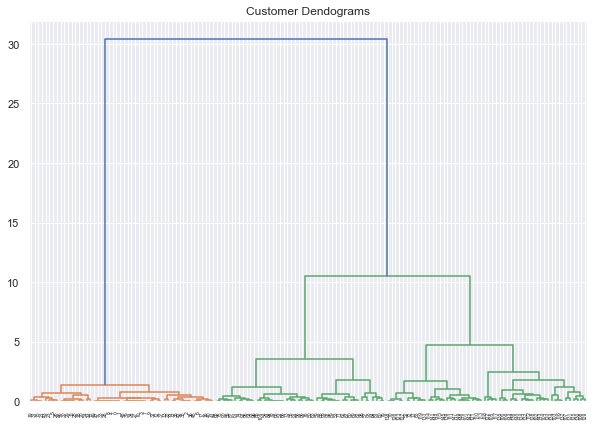

In [92]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dent = shc.dendrogram(shc.linkage(data, method='ward'))

In [93]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 1, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 1, 2, 1, 4, 4, 4, 4, 1, 4, 2, 2, 2, 2, 1, 4, 4, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

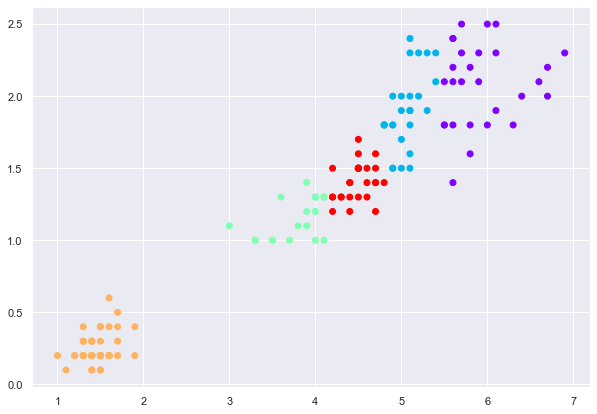

In [94]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap="rainbow")